In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("ticks")

%matplotlib inline

### Data input and cleaning

In [17]:
import re
data = pd.read_csv("data2.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]

def sanitize(data):
    return ''.join(filter(lambda x: x in ',.0123456789', data))

data['history'] = data['fhistory'].apply(sanitize)
data['ctime'] = data['currenttime'].apply(sanitize)

data['frac'] = data['sol'].str.count("1")/40

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "Unnamed: 0", "fhistory", "currenttime"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)

data.head()

,crossover,errorLimit,f1,grad,nPop,sol,time,error,history,ctime,frac,1,2,3,4,5,6
0,ModalSixPoint,0.01,75,150,10,1100111111111000111001000110100001000000,3614.198289,18.449500,"47.50985222,47.50985222,47.50985222,47.5098522...","89.84819627,108.66879368,108.66950202,122.3201...",0.475,70.047162,216.893154,320.385621,534.392199,730.739257,820.501232
1,ModalSixPoint,0.01,75,150,15,1011011110100111010001000100010000000000,3610.813264,13.497692,"41.99718355,39.14067882,38.45716379,38.4571637...","132.66649699,150.81971335,170.09373927,188.165...",0.375,73.569689,215.783526,337.250939,513.218552,714.656558,862.704357
2,ModalSixPoint,0.01,75,150,20,0111010111010110011001100010111000001000,3606.429924,15.502590,"40.20535376,40.20535376,40.20535376,38.0606451...","182.34400511,220.04358315,252.02906418,275.610...",0.475,69.845288,234.064008,342.351272,520.445668,733.736222,865.912741
3,ModalSixPoint,0.01,75,150,25,1110011111010110011000100010001100000000,3607.390703,13.476109,"33.17135371,33.17135371,33.17135371,28.1608752...","211.48623085,275.95574427,347.7589221,390.0945...",0.425,76.658759,228.449721,347.858024,536.367979,740.601496,864.422642
4,ModalSixPoint,0.01,75,150,30,0011111101111101010001100011011100000000,3608.900983,13.948158,"38.62900407,32.15816759,32.15816759,31.1112858...","278.0268755,391.25071645,487.70587778,543.7627...",0.500,71.712575,213.625067,342.974250,523.633066,728.071505,856.908600


In [18]:
errors = data.drop(['crossover', 'errorLimit', 'sol', 'time', 'history', 'frac', "f1", "grad"], axis=1)
errors.drop([x for x in errors.columns if type(x)==int], axis=1, inplace=True)
mean_errors = errors.groupby(["nPop"], as_index=False).describe()["error"]
dict_e = {x: 10+x*5 for x in range(7)}
dict_e.update({7: 50, 8: 60})
mean_errors = mean_errors.rename(index=dict_e)
mean_errors["var"] = mean_errors["std"]**2
mean_errors

,count,mean,std,min,25%,50%,75%,max,var
10,10.0,13.602324,1.876332,11.406727,12.767255,13.345452,13.524071,18.449500,3.520620
15,10.0,12.274137,1.073799,10.951564,11.396227,12.124373,13.281660,13.703040,1.153045
20,10.0,12.592322,1.694479,11.100756,11.375189,11.932160,13.484007,15.502590,2.871258
25,10.0,13.641919,2.252326,11.210268,12.000207,13.072283,14.073267,17.706260,5.072974
30,10.0,13.137597,1.609308,11.349430,12.182453,13.105487,13.555477,16.973631,2.589874
35,10.0,12.604130,1.084325,10.855181,11.659376,12.869615,13.467812,13.991206,1.175761
40,10.0,13.738393,2.467350,9.363792,12.493168,13.115685,15.490968,18.185588,6.087814
50,10.0,13.350173,0.872284,11.994687,12.787066,13.331354,14.072811,14.553542,0.760879
60,10.0,13.694066,2.008476,11.240105,12.045223,13.198770,15.808149,16.180396,4.033977


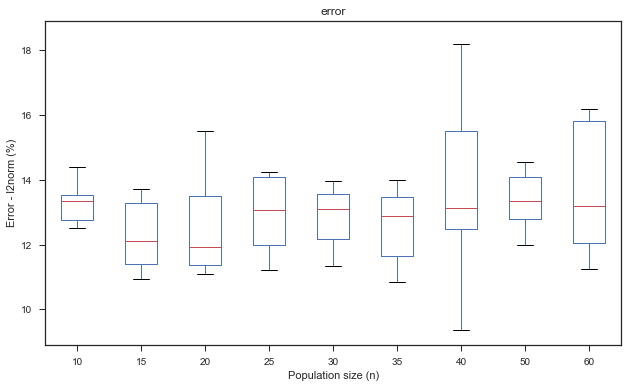

In [24]:
plt.rcParams["figure.figsize"] =(10, 6)

plt.rcParams.update({'font.size':20})
ax = errors.boxplot(by="nPop", grid=False)
plt.suptitle("")
plt.xlabel("Population size (n)")
plt.ylabel("Error - l2norm (%)")
ax.set_facecolor("white")
# plt.title("Population size testing")
plt.savefig("pop.pgf")
plt.show()


In [20]:
history = data.drop(['crossover', 'errorLimit', 'sol', 'time', 'frac', "f1", "grad", "error"], axis=1)
history.drop([x for x in history.columns if type(x)==int], axis=1, inplace=True)
history = pd.concat([history, history['history'].str.split(',', expand=True).apply(pd.to_numeric)], axis=1)
history.drop(["history"], axis=1, inplace=True)

history["ctime"] = history['ctime'].str.split(',', expand=False).apply(pd.to_numeric)

history.head()

,nPop,ctime,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,10,"[89.84819627, 108.66879368, 108.66950202, 122....",47.509852,47.509852,47.509852,47.509852,46.306241,43.002844,39.808309,39.808309,...,18.449500,18.449500,18.449500,18.449500,18.449500,18.449500,18.449500,18.449500,18.449500,18.449500
1,15,"[132.66649699, 150.81971335, 170.09373927, 188...",41.997184,39.140679,38.457164,38.457164,38.457164,37.918596,36.878284,34.125415,...,13.497692,13.497692,13.497692,13.497692,13.497692,13.497692,13.497692,13.497692,13.497692,13.497692
2,20,"[182.34400511, 220.04358315, 252.02906418, 275...",40.205354,40.205354,40.205354,38.060645,36.676748,30.619054,28.492075,28.492075,...,15.502590,15.502590,15.502590,15.502590,15.502590,15.502590,15.502590,15.502590,15.502590,15.502590
3,25,"[211.48623085, 275.95574427, 347.7589221000000...",33.171354,33.171354,33.171354,28.160875,28.160875,28.160875,28.160875,28.160875,...,13.476109,13.476109,13.476109,13.476109,13.476109,13.476109,13.476109,13.476109,13.476109,13.476109
4,30,"[278.0268755, 391.25071645, 487.70587778, 543....",38.629004,32.158168,32.158168,31.111286,31.111286,31.111286,31.111286,31.111286,...,13.948158,13.948158,13.948158,13.948158,13.948158,13.948158,13.948158,13.948158,13.948158,13.948158


In [21]:
tseries = [[],[]]
for index, row in history.iterrows():
    tseries[1].append(pd.Series([row[x] for x in history.columns if type(x)==int], index=row["ctime"]))
    tseries[0].append(row["nPop"])


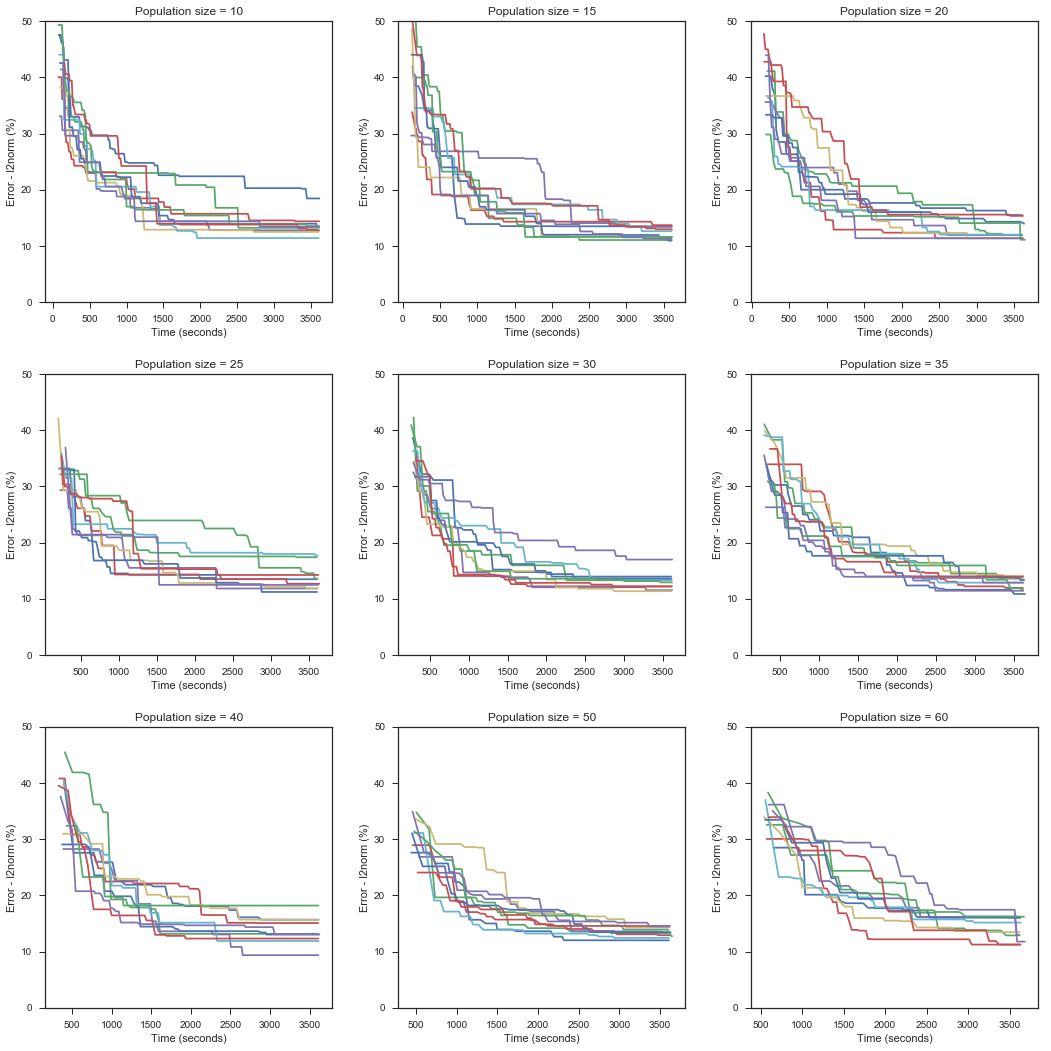

In [22]:
fig = plt.figure(figsize=(15, 15))

for index, i in enumerate([10, 15, 20, 25, 30, 35, 40, 50, 60]):
    fig.add_subplot(3, 3, index+1)
    popseries = [tseries[1][x] for x in range(len(tseries[0])) if tseries[0][x] == i]
    for k in popseries:
        plt.plot(k)
    plt.title("Population size = {}".format(i))
    plt.xlabel("Time (seconds)")
    plt.ylabel("Error - l2norm (%)")
    plt.ylim([0, 50])
    
plt.tight_layout()
plt.show()